<a href="https://colab.research.google.com/github/cristianflorez15/proyecto_fundamentos_deep_learning/blob/main/01_exploraci%C3%B3n_de_datos_y_modelo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para importa la DB desde el repositorio virtual
!pip install ucimlrepo

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import time
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [ ]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

# Transformar en arrays de np
X_np = X.to_numpy()
y_np = y.to_numpy().ravel()

# Codificación de la variable target para 1 = M y 0 = B
y_np = (y_np == 'M').astype(int)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
#Para calcular el error cuando no se use accuracy_score de sklearn.metrics
def error(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1

    error = error/np.size(Y)

    return error

In [ ]:
#arquitectura CNN
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Reshape((input_shape[0], 1, 1)), # Reshape para CNN 1D
        layers.Conv2D(32, (3, 1), activation='relu'),
        layers.MaxPooling2D((2, 1)),
        layers.Conv2D(64, (3, 1), activation='relu'),
        layers.MaxPooling2D((2, 1)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # Dropout para regularización
        layers.Dense(1, activation='sigmoid') # Salida binaria
    ])
    return model

# Ejemplo de uso:
input_shape = X_np.shape[1:] # Obtener la forma de entrada de los datos
model = create_cnn_model(input_shape)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 30, 1, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 1, 32)           │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 1, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,041 (121.25 KB)

 Trainable params: 31,041 (121.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4854 - loss: 12.3795 - val_accuracy: 0.4945 - val_loss: 1.1843
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6882 - loss: 1.4754 - val_accuracy: 0.8791 - val_loss: 0.5103
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7616 - loss: 0.5278 - val_accuracy: 0.8791 - val_loss: 0.4585
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8128 - loss: 0.4587 - val_accuracy: 0.8791 - val_loss: 0.4384
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6748 - loss: 0.5544 - val_accuracy: 0.8681 - val_loss: 0.4699
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6827 - loss: 0.4983 - val_accuracy: 0.8022 - val_loss: 0.5144
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7103 - loss: 0.5122 - val_accuracy: 0.8791 - val_loss: 0.3649
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8253 - loss: 0.4039 - val_accuracy: 0.

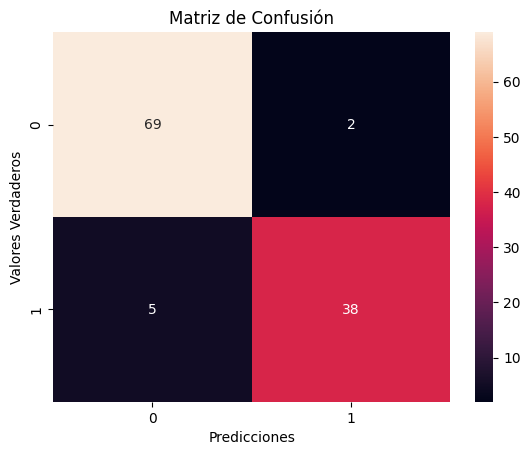

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)


# Crear y entrenar el modelo
input_shape = X_train.shape[1:]
model = create_cnn_model(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Entrenar el modelo con early stopping para evitar el sobreajuste
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Matriz de confusión (opcional)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6662 - loss: 0.7404 - val_accuracy: 0.7912 - val_loss: 0.6550
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8847 - loss: 0.3259 - val_accuracy: 0.7363 - val_loss: 0.6198
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9177 - loss: 0.2296 - val_accuracy: 0.7253 - val_loss: 0.5917
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9339 - loss: 0.1687 - val_accuracy: 0.7253 - val_loss: 0.5697
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9531 - loss: 0.1326 - val_accuracy: 0.7582 - val_loss: 0.5457
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9741 - loss: 0.1030 - val_accuracy: 0.7582 - val_loss: 0.5173
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9655 - loss: 0.1053 - val_accuracy: 0.8022 - val_loss: 0.4836
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9518 - loss: 0.1089 - val_accuracy: 0.

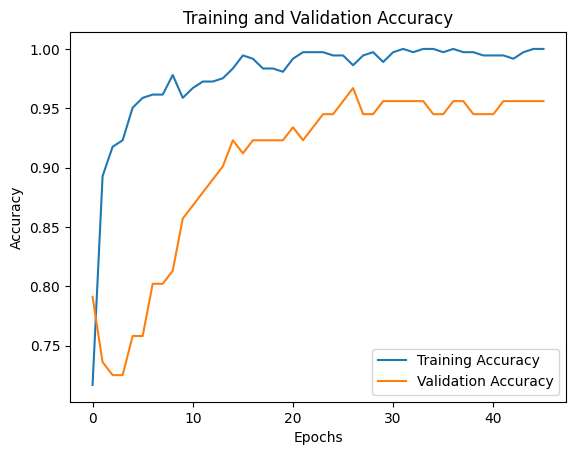

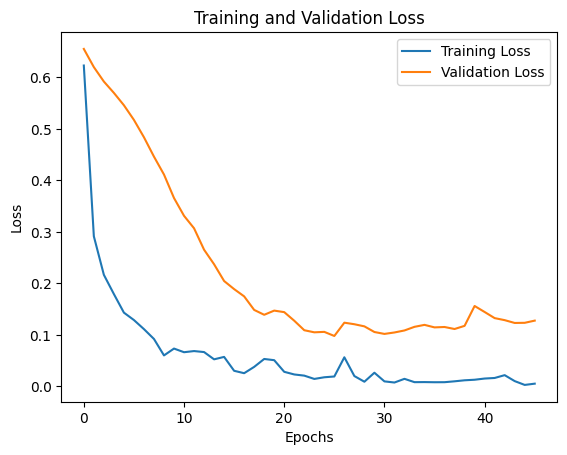

In [ ]:
# Data scaling (Normalization)
scaler = StandardScaler()
X_np = scaler.fit_transform(X_np)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Improved CNN architecture with increased complexity and regularization
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Reshape((input_shape[0], 1, 1)),
        layers.Conv2D(64, (3, 1), activation='relu', padding='same'),  # Increased filters and padding
        layers.BatchNormalization(),  # Batch normalization for stability
        layers.MaxPooling2D((2, 1)),
        layers.Conv2D(128, (3, 1), activation='relu', padding='same'),  # Increased filters
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Conv2D(256, (3, 1), activation='relu', padding='same'),  # Added another convolutional layer
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),  # Increased units in dense layer
        layers.Dropout(0.5),  # Dropout for regularization
        layers.Dense(128, activation='relu'),  # Added another dense layer
        layers.Dropout(0.3),  # Another dropout layer
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the CNN model
input_shape = (X_train.shape[1],)  # Assuming input features are flattened
model = create_cnn_model(input_shape)

# Training with increased epochs and a reduced learning rate
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model and print additional metrics
loss, accuracy = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.4643 - loss: 9.5759 - precision_1: 0.3471 - recall_1: 0.5537 - val_accuracy: 0.3626 - val_loss: 9.1711 - val_precision_1: 0.3626 - val_recall_1: 1.0000 - learning_rate: 5.0000e-05
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6377 - loss: 9.3178 - precision_1: 0.5013 - recall_1: 0.5643 - val_accuracy: 0.8571 - val_loss: 9.1162 - val_precision_1: 0.8846 - val_recall_1: 0.6970 - learning_rate: 5.0000e-05
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6591 - loss: 9.2179 - precision_1: 0.5349 - recall_1: 0.5168 - val_accuracy: 0.7912 - val_loss: 9.0602 - val_precision_1: 0.8500 - val_recall_1: 0.5152 - learning_rate: 5.0000e-05
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7356 - loss: 9.0681 - precision_1: 0.6825 - recall_1: 0.6787 - val_accuracy: 0.7582 - val_loss: 8.9979 - val_precision_1: 0.8235 - val_recall_1: 0.4242 - learning_rate: 5.0000e-05
Epoch 5/200
23/2

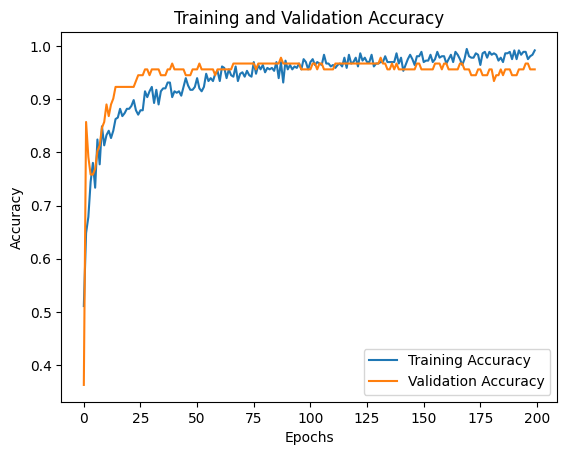

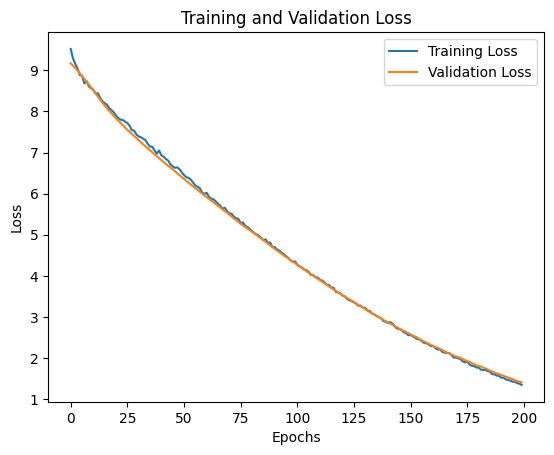

In [ ]:
# Data scaling (Normalization)
scaler = StandardScaler()
X_np = scaler.fit_transform(X_np)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Enhanced CNN architecture
def create_enhanced_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Reshape((input_shape[0], 1, 1)),

        # First block
        layers.Conv2D(64, (5, 1), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Dropout(0.2),  # Regularization

        # Second block
        layers.Conv2D(128, (5, 1), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Dropout(0.3),  # Regularization

        # Third block
        layers.Conv2D(256, (3, 1), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Dropout(0.4),  # Regularization

        # Fourth block (optional additional complexity)
        layers.Conv2D(512, (3, 1), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 1)),
        layers.Dropout(0.4),

        # Flattening and dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the model
input_shape = (X_train.shape[1],)  # Assuming input features are flattened
model = create_enhanced_cnn_model(input_shape)

# Compile the model with reduced learning rate and additional metrics
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00005),  # Reduced learning rate
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
